Name: `Mahsa Amani` 

**Student ID:** `97105769`

# Q1

## a

In [107]:
from playsound import playsound
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import resample, butter, sosfilt, TransferFunction, bode
import matplotlib.pyplot as plt
import control

In [16]:
# play music1
playsound(os.getcwd() + '\\music1.wav')

In [11]:
# play music2
playsound(os.getcwd() + '\\music2.wav')

In [6]:
# load musics
samplerate_music1, music1 = wavfile.read('music1.wav')
samplerate_music2, music2 = wavfile.read('music2.wav')

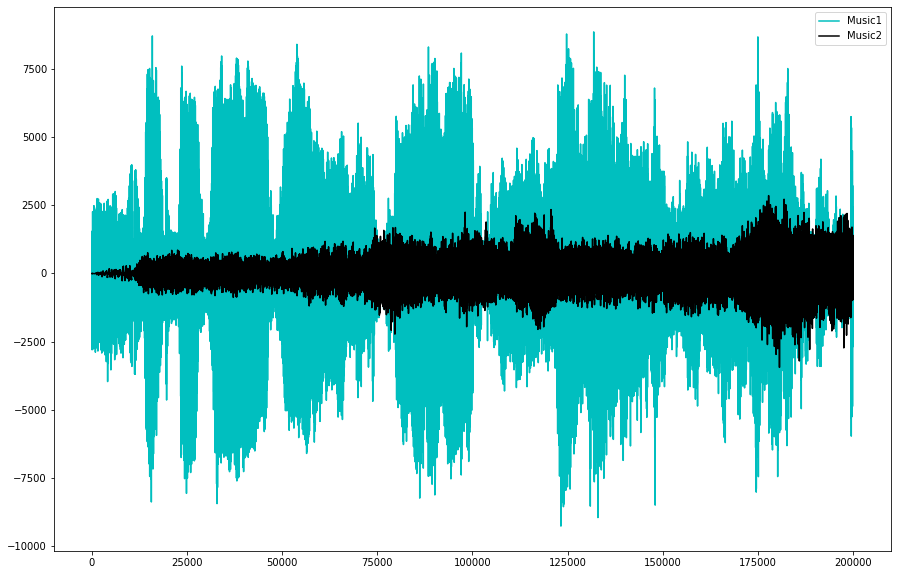

In [10]:
# Music plots in time domain
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(music1, color='c', label='Music1')
plt.plot(music2, color='k', label='Music2')
plt.legend()

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Music1 shifted in time domain')

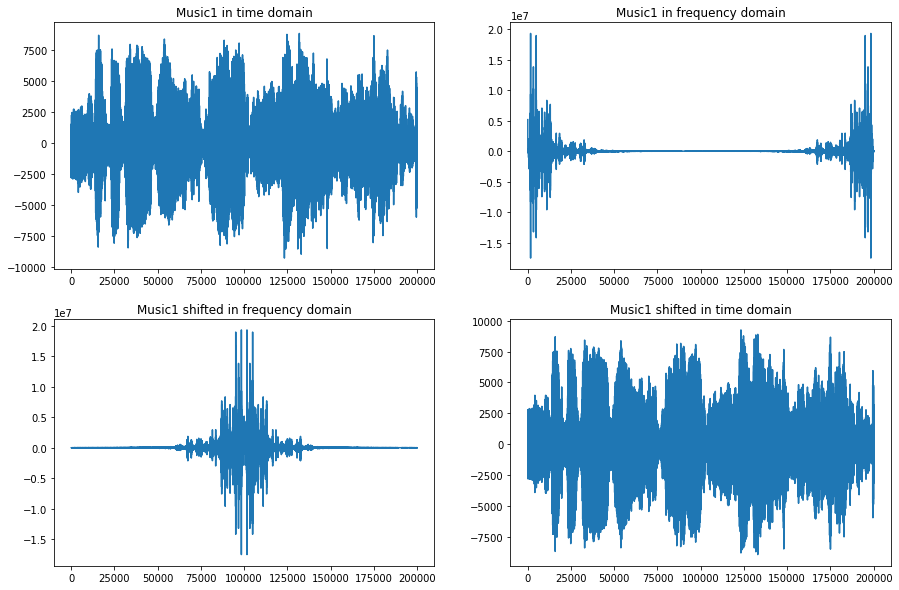

In [47]:
# music 1

# frequency domain
music1_fft = np.fft.fft(music1)

# shift in frequency domain
music1_fft_shifted = np.fft.fftshift(music1_fft)

# back in time domain
music1_shifted = np.fft.ifft(music1_fft_shifted)

# plots of these
fig , axes = plt.subplots(2, 2 , figsize = (15,10))
axes[0, 0].plot(music1)
axes[0, 0].set_title("Music1 in time domain")

axes[0, 1].plot(music1_fft)
axes[0, 1].set_title("Music1 in frequency domain")

axes[1, 0].plot(music1_fft_shifted)
axes[1, 0].set_title("Music1 shifted in frequency domain")

axes[1, 1].plot(music1_shifted)
axes[1, 1].set_title("Music1 shifted in time domain")

In [51]:
wavfile.write("music1_shifted_.wav", samplerate_music1, music1_shifted.astype(np.int16))

C:\Users\ARIAN\AppData\Local\Temp/ipykernel_5136/2714951218.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("music1_shifted_.wav", samplerate_music1, music1_shifted.astype(np.int16))


In [34]:
# music 2

# frequency domain
music2_fft = np.fft.fft(music2)

In [52]:
print(music1)
print("---------------------------------")
print(music1_shifted)

[1090 1548 1360 ... 1746 1856 1638]
---------------------------------
[ 1090.+5.61158231e-15j -1548.+9.27320798e-14j  1360.-2.90810931e-13j ...
 -1746.+1.89442187e-14j  1856.-4.98239111e-13j -1638.+2.51804528e-13j]


<div style="direction:rtl">
مقادیر در حالت شیفت‌یافته، مقادیر بزرگ و کوچک و مثبت و منفی زیادی دارند و این نوسانات بسیار بالا عملا باعث می‌شود که صدای واضحی پخش نشود. 
</div>

## b

In [58]:
# sum of signals
mixed_fft = music1_fft_shifted + music2_fft

# from frequency domain to time domain
mixed = np.fft.ifft(mixed_fft)

In [59]:
wavfile.write("mixed.wav", samplerate_music1, mixed.astype(np.int16))

C:\Users\ARIAN\AppData\Local\Temp/ipykernel_5136/2377754128.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("mixed.wav", samplerate_music1, mixed.astype(np.int16))


<div style="direction:rtl">
صدای موسیقی دوم پخش می‌شود. چون شیفت موسیقی اول باعث می شود صدای آن واضح پخش نشود ولی موسیقی دوم به همان شکلی که بوده دوباره بازیابی شده و پخش می‌شود.
</div>

## c

In [60]:
# shift the mixed signal
mixed_fft_shifted = np.fft.fftshift(mixed_fft)

In [61]:
# from frequency to time domain
mixed_shifted = np.fft.ifft(mixed_fft_shifted)

In [62]:
wavfile.write("mixed_shifted.wav", samplerate_music1, mixed_shifted.astype(np.int16))

C:\Users\ARIAN\AppData\Local\Temp/ipykernel_5136/2667697920.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write("mixed_shifted.wav", samplerate_music1, mixed_shifted.astype(np.int16))


<div style="direction:rtl">
این بار موسیقی اول پخش می‌شود و موسیقی دوم پخش نمی‌شود. با شیفت فرکانسی دوم، موسیقی اول به حالت اول خود برمیگردد اما موسیقی دوم یک بار شیفت فرکانسی می خورد و مثل حالتی می شود که در بخش قبل برای موسیقی اول پیش آمد. علت این پدیده هم خطی بودن تبدیل فوریه و حوزه فرکانس است یعنی شیفت فرکانسی دوم، باعث می شود موسیقی دوم شیفت فرکانسی بخورد و موسیقی اول هم که در این سیگنال قبلا شیفت فرکانسی خورده بود، با شیفت فرکانسی دوم بازیابی شود.
</div>

# Q2

## 1

$$x[n] = 
\begin{cases}
\frac{1}{N} \sum_{k=0}^{N-1} X[k] \,e^{j \frac{2\pi}{N} kn}, &\text{n=0, 1, ..., N-1} \\
0, &\text{otherwise} \\
\end{cases}

<div style="direction:rtl">
در زیر درستی فرمول بالا نشان داده شده است:
</div>

$$\frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j \frac{2\pi}{N} kn} = \frac{1}{N} \sum_{k=0}^{N-1}(\sum_{m=0}^{N-1} x[m] e^{- j \frac{2\pi}{N} km}) e^{j \frac{2\pi}{N} kn}$$

$$= \frac{1}{N}\sum_{m=0}^{N-1}\sum_{k=0}^{N-1} x[m] e^{j \frac{2\pi}{N} k(n-m)} = \sum_{m=0}^{N-1} x[m] (\frac{1}{N} \sum_{k=0}^{N-1} e^{j \frac{2\pi}{N} k(n-m)})$$
$$=\sum_{m=0}^{N-1} x[m] \delta[n-m] = x[n]$$

## 2

In [63]:
def fft(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    dft = x.copy()

    for i in range(N):
        sum = 0
        for j in range(N):
            tmp = x[j] * np.exp(-2j * np.pi * j * i * np.divide(1, N, dtype=complex))
            sum += tmp
        dft[i] = sum
    return dft


## 3

In [64]:
def ifft(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    idft = np.zeros(N, dtype=complex)

    for i in range(N):
        sum = 0
        for j in range(N):
            tmp = x[j] * np.exp(2j * np.pi * i * j * np.divide(1, N, dtype=complex))
            sum += tmp
        idft[i] = np.divide(sum, N, dtype=complex)
    return idft

## 4

In [65]:
import math
def signal_construction(N, T):
    x = np.zeros(N, dtype=complex)
    for i in range(N): 
        x[i] = math.cos(np.pi * T * (i-(N/2)))
    return x

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


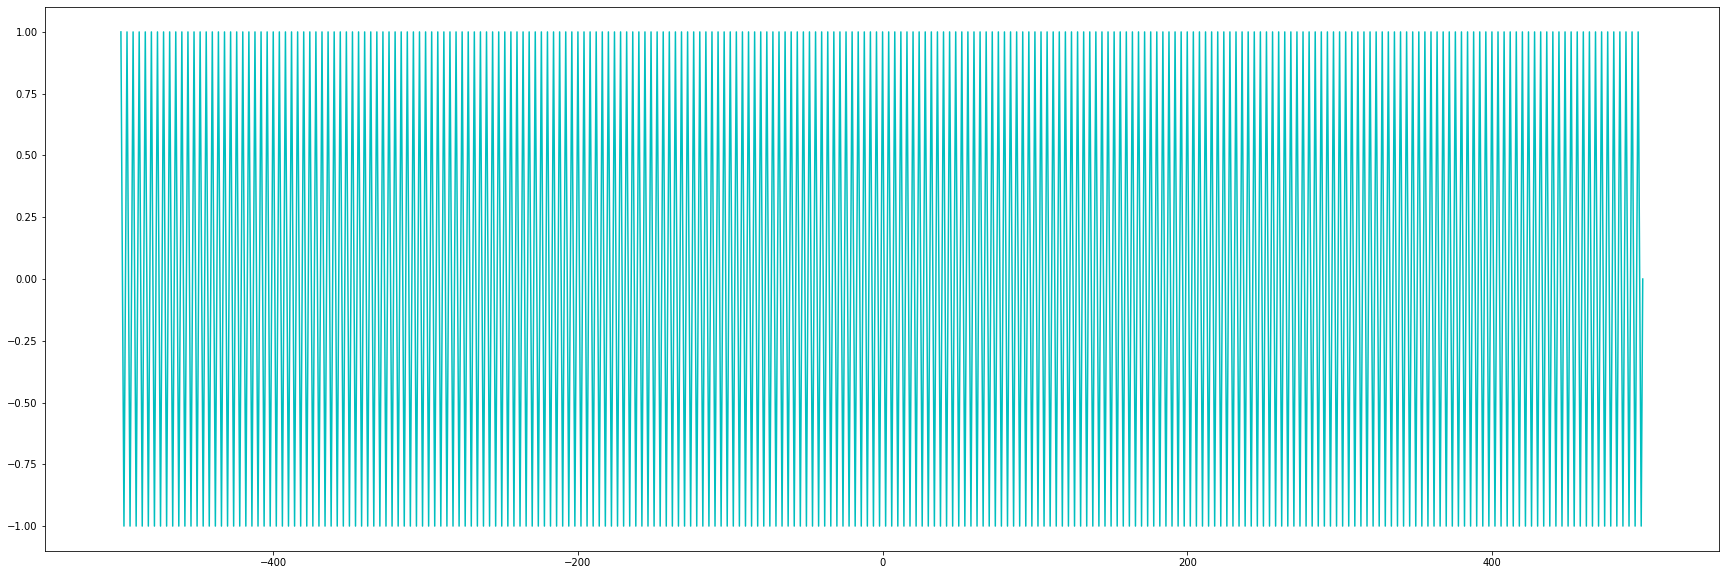

In [67]:
x = signal_construction(1000, 0.5)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(range(-500, 500), x, color='c')

## 5

In [69]:
x_fft = np.fft.fft(x)

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


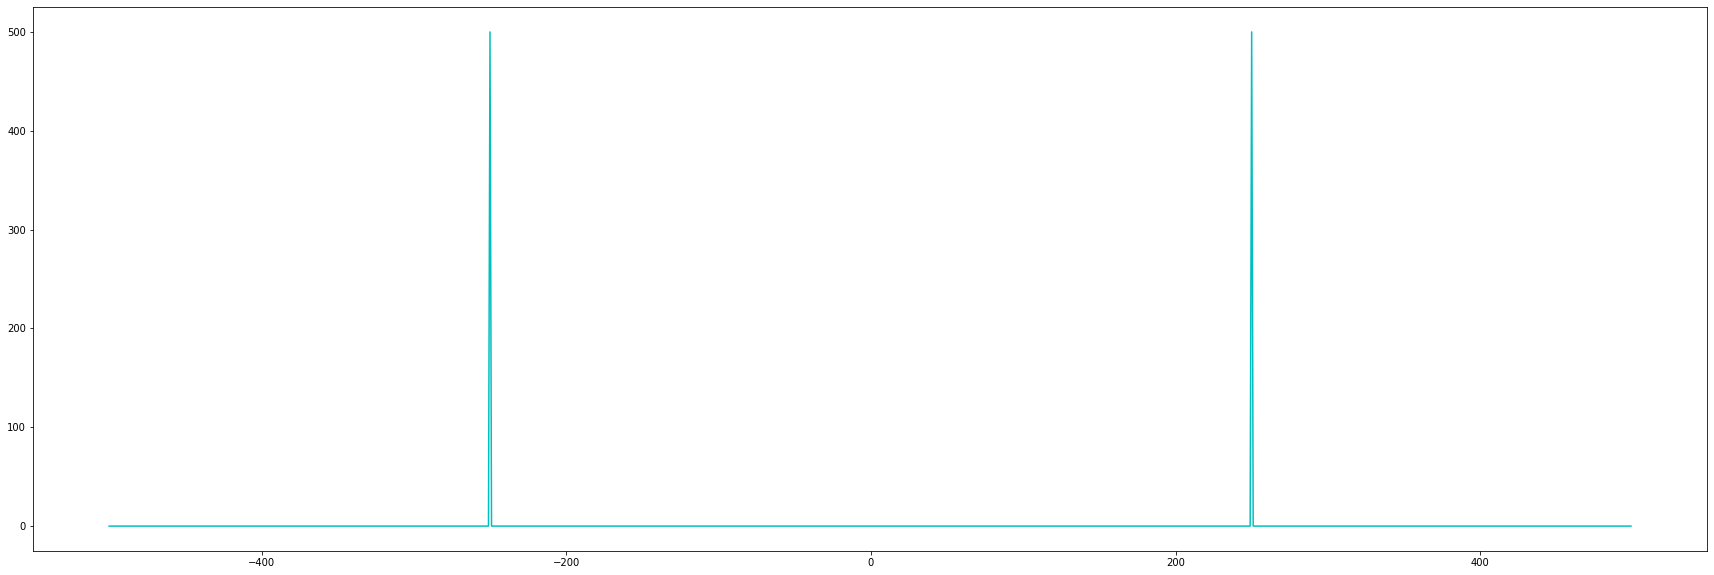

In [70]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(range(-500, 500), x_fft, color='c')

## 6

In [71]:
x_fft_ = fft(x)

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


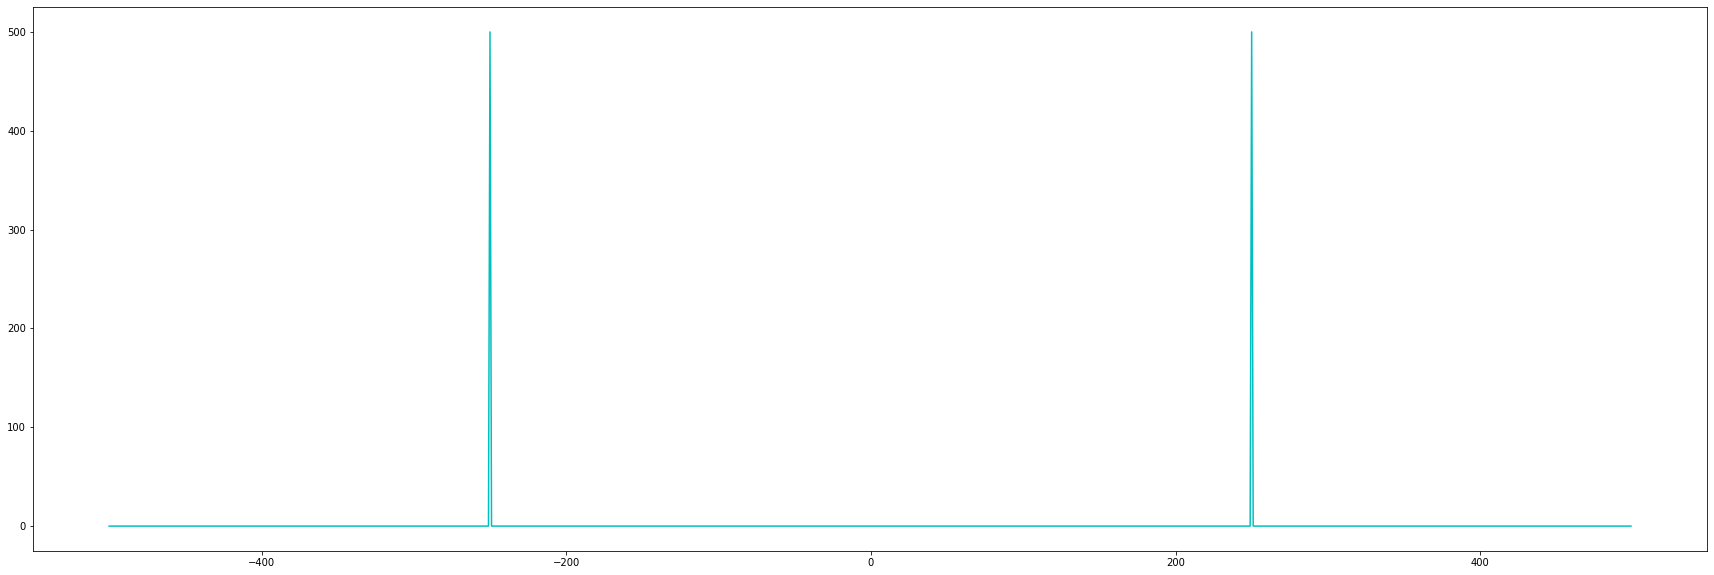

In [73]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(range(-500, 500), x_fft_, color='c')

In [74]:
np.allclose(x_fft, x_fft_)

True

## 7

In [75]:
x_idft = ifft(x_fft_)

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


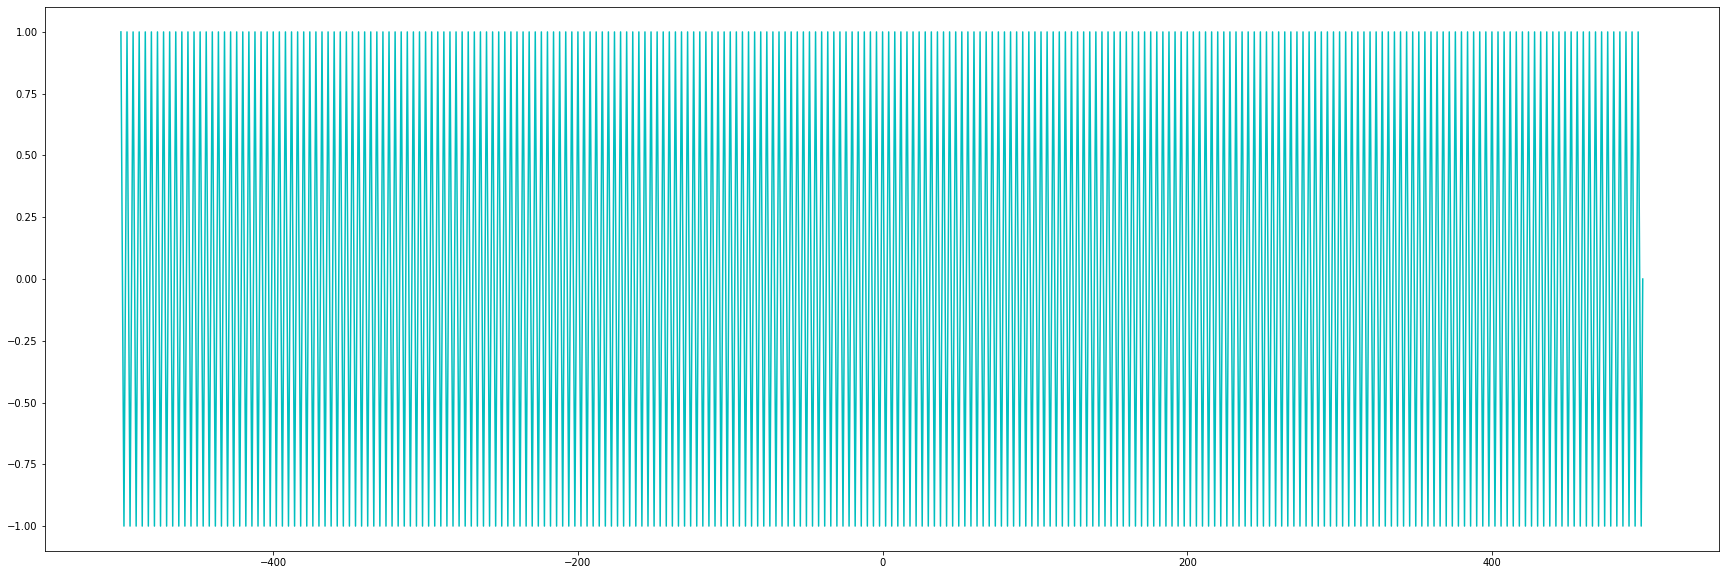

In [76]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(range(-500, 500), x_idft, color='c')

In [77]:
np.allclose(x_idft, np.fft.ifft(x_fft))

True

<div style="direction:rtl">
بله
</div>

## 8

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: Compl

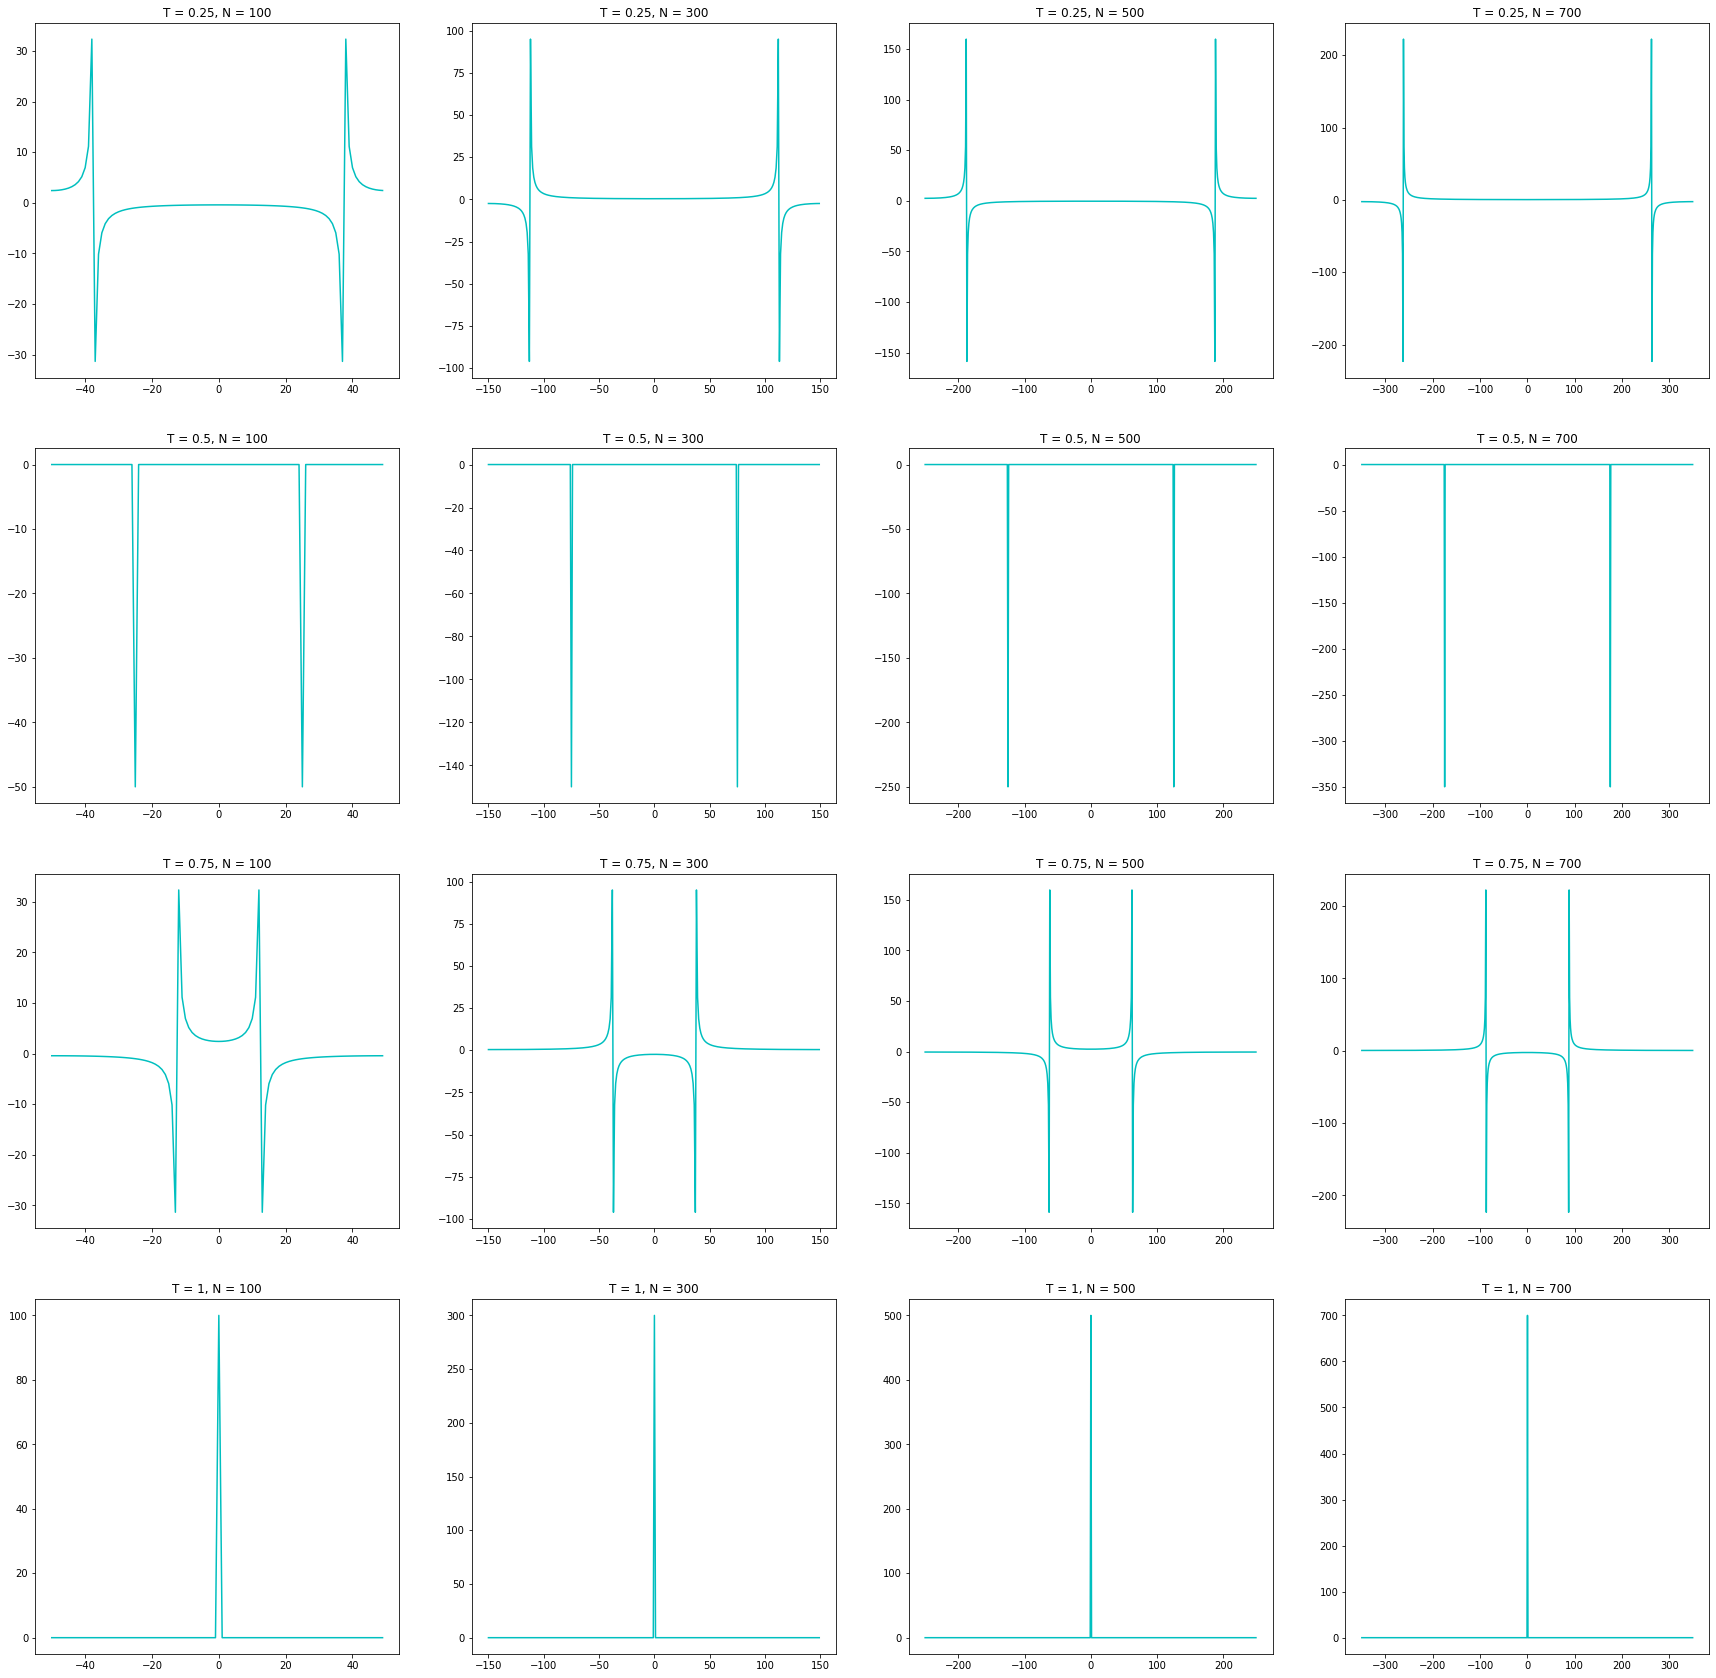

In [114]:
T = [0.25, 0.5, 0.75, 1]
N = [100, 300, 500, 700]

fig, axes = plt.subplots(len(T), len(N))
fig.set_figwidth(30)
fig.set_figheight(30)
for i, t in enumerate(T):
    for j, n in enumerate(N):
        axes[i%len(T), j%len(N)].plot(range(-n//2, n//2), fft(signal_construction(n, t)), color='c')
        axes[i%len(T), j%len(N)].set_title(f"T = {t}, N = {n}")

# Q3

In [79]:
samplerate_clean1, clean1 = wavfile.read("clean1.wav")
samplerate_distorted1, distorted1 = wavfile.read("distorted1.wav")
samplerate_distorted2, distorted2 = wavfile.read("distorted2.wav")


In [80]:
clean1_fft = np.fft.rfft(clean1)
distorted1_fft = np.fft.rfft(distorted1)
distorted2_fft = np.fft.rfft(distorted2)

In [93]:
H = distorted1_fft / clean1_fft

In [94]:
# sampling to get the same sample rate 
H = resample(H, len(distorted2_fft))

In [102]:
# add a value to H in order to avind zero division and getting too large values, best found number is 0.05
clean2_fft = distorted2_fft / (H + 0.005)

In [103]:
clean2 = np.fft.irfft(clean2_fft)

In [104]:
wavfile.write("recovered2.wav", samplerate_distorted2, clean2.astype(np.int16))

$$H(j\omega) = \frac{Y (j \omega)}{X (j \omega)}$$


<div style="direction:rtl">
ابتدا بر اساس صدای اول و خروجی سیستم برای آن صدا، طبق فرمول بالا مقدار پاسخ سیستم را از تقسیم آن دو بر هم بدست می آوریم. سپس چون سایز این گروه صداها با صدای دوم یکی نیست، از پاسخ فرکانسی بدست آمده نمونه برداری می کنیم تا اندازه هر دو یکسان شود. نهایتا برای اینکه صدای ورودی را بدست آوریم که همان X در فرمول بالا است، خروجی را بر پاسخ فرکانسی بدست آمده در مرحله قبل تقسیم می کنیم اما باید توجه کنیم که در هنگام تقسیم ممکن است برخی اعداد بسیار کوچک و نزدیک به صفر باشند و تقسیم بر آن ها مقادیر بزرگی تولید کند، پس مقدار کمی را به مخرج اضافه میکنیم( چند عدد تست شد و این مورد نتیجه بهتری داد).
</div>

# Q4

In [105]:
samplerate_noisy1, noisy1 = wavfile.read("noisy1.wav")
noisy1_fft = np.fft.rfft(noisy1)

In [135]:
rates = (samplerate_noisy1 / 2) * np.linspace(0, 1, len(noisy1_fft))

C:\Users\ARIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


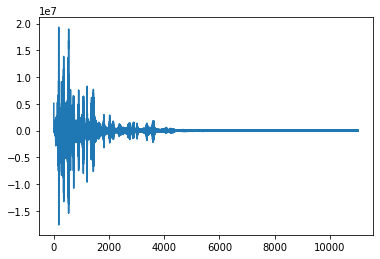

In [136]:
plt.plot(rates, noisy1_fft)

<div style="direction:rtl">
طبق نمودار مقادیری که بزرگ هستند نشان دهنده نویز هستند و می تواند آن ها را فیلتر کرد. برای این کار مقادیری را اندازه شان بزرگتر از 1e7 است را فیلتر می کنیم.
</div>

In [138]:
first, last = None, None
for i in range(1, len(noisy1_fft)):
    if noisy1_fft[i]>1e7 or noisy1_fft[i]<-1e7:
        if first == None:
            first = rates[i]
        last = rates[i]
        
print(first, last)

176.51024999999998 721.0901250000001


<div style="direction:rtl">
پس فرکانس های بین این دو عدد را فیلتر می کنیم.
</div>

In [139]:
wc = np.array([int(first),int(last)])* 2 / samplerate_noisy1
sos = butter(5, wc, btype='bandpass', output="sos")
denoised = sosfilt(sos, noisy1)

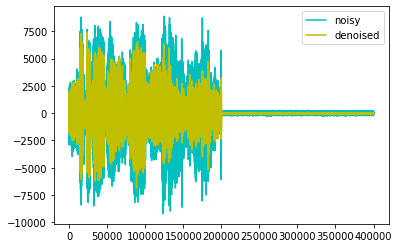

In [143]:
plt.plot(noisy1, color='c', label='noisy')
plt.plot(denoised, color='y', label='denoised')
plt.legend()

In [142]:
wavfile.write("denoise1.wav" , samplerate_noisy1, denoised.astype(np.int16))

<div style="direction:rtl">
مشاهده می‌کنیم که نویز تقریبا حذف شده است. علی الخصوص در نیمه دوم اهنگ که نویز را به طور جداگانه و بدون صدای اصلی داشتیم، اکنون صدای خاصی شنیده نمی‌شود.
  نکته قابل ذکر این است که اندکی از فرکانس‌های بعدی هم باقی مانده که با بالابردن درجه فیلتر می‌توان آنان را حذف کرد اما چون بخش اندکی از صدای اصلی هم در این فرکانس‌ها موجود است و آن ها نیز کیفیت خود را از دست می دادند این کار را نکردم. در حقیقت یک تریدآف بین این که چه قدر نویز را از بین ببریم و چه قدر صداهای مفید بازه‌های انتهایی فرکانس را از بین ببریم وجود دارد.
</div>

# Q5

In [110]:
num = np.array([1, 2, 10])
den = np.array([1, 0, 25+(19*(10**5)) , 10])

<div style="direction:rtl">
بدون کتابخانه control
</div>

In [113]:
def H(s):
    nom = (1j*s)**2 + 2j*s+10
    den = (1j*s)**3 + (25 + 1.9 * 10**6) * 1j*s + 10
    return nom / den

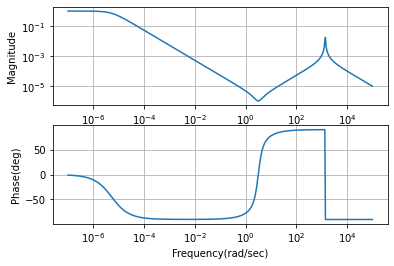

In [132]:
w = np.logspace(-7, 5, num=500)

Mag_Normal = np.abs(H(w))
Phase = np.angle(H(w)) * 180 / (np.pi)

fig, axes = plt.subplots(2, 1)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_ylabel("Magnitude")
axes[0].plot(w, Mag_Normal)
axes[0].grid()

axes[1].set_xscale("log")
axes[1].set_xlabel("Frequency(rad/sec)")
axes[1].set_ylabel("Phase(deg)")
axes[1].plot(w, Phase)
axes[1].grid()


<div style="direction:rtl">
با کتابخانه control
</div>

In [109]:
H = control.tf([1, 2, 10],[1, 0, 25+(19*(10**5)) , 10])
H

TransferFunction(array([ 1,  2, 10]), array([      1,       0, 1900025,      10]))

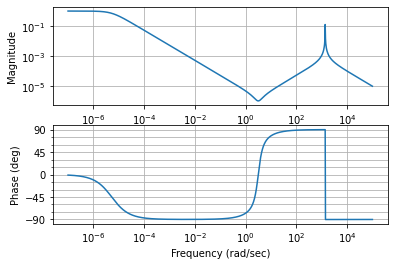

In [111]:
mag, phase, omega = control.bode(H)

(array([ 2.63154432e-06+1378.41394363j,  2.63154432e-06-1378.41394363j,
        -5.26308864e-06   +0.j        ]),
 array([-1.+3.j, -1.-3.j]))

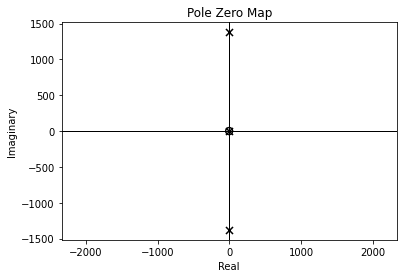

In [112]:
control.pzmap(H, plot=True)

ابتدا از فرکانس حدود $ 10^{-7}$ با شیب 20 اندازه کاهش می یابد و فاز نیز به -90 می رسد. تا زمانیکه به $\sqrt{10}$ می رسیم و در آن جا ریشه مختلط صورت کسر بوجود می آید و اندازه با شیب 20 افزایش می باید(40 واحد افزایش در شیب) و فاز نیز به 90 می رسد(180 درجه افزایش). بعد از آن از حدود 1378 که ریشه های مخرج یعنی به قطب ها می رسیم اندازه دوباره با شیب 20 کاهش می یابد و فاز به -90 می رسد.